## How can I quickly explore a catalog of billions of rows on my laptop?

If you have been asking yourself this question, then [**vaex**](https://vaex.io/docs/index.html) is your answer!

*vaex* is an out-of-core DataFrame library capable of processing billions of rows of data per second, and it does so without loading the entire catalog into memory. Thanks to memory mapping, vaex can load gigabytes of data instantly, reading only parts of the data that are absolutely necessary. 

Vaex was conceived to be of help to data scientists willing to quickly visualise and explore a big dataset. In fact, vaex implements histograms and 2D density plots as an effective way to glance through a catalog with millions/billions entries and it can also compute statistics, such as count, mean, correlation, very efficiently, in a matter of seconds on a standard laptop.

I am coming back to this library after a long break of a couple of years where I haven't had the chance to use it so much and several cool new features have been added in the meantime. I actually have a rather personal relation with this package since I was in Groningen working together with the founders of `vaex.io` back in 2016-2018 when the vaex project started. In our research group we used to use this library a lot for our day-to-day catalog explorations, and I'm sure that our feedback and use cases have been critical in the early development.

In this notebook I am going to showcase some simple things that one can do with vaex.

## 146 millions rows of data: NYC yellow taxi dataset 2015

For this notebook I am going to use the famous dataset containing trip information of taxis in New York City in the year 2015 from the Yellow Taxi company. This dataset contains 146 million rows, occupies about 13 GB of disk space and can be found [here](https://vaex.io/docs/datasets.html).

In [1]:
import vaex

In [2]:
#| code-fold: true
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
%%time
df = vaex.open('data/yellow_taxi_2015_f32s.hdf5')
df

CPU times: user 919 ms, sys: 390 ms, total: 1.31 s
Wall time: 5.21 s


#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.09,-73.986725,40.75642,1.0,nan,-73.99646,40.742893,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28,-74.00419,40.72119,1.0,nan,-73.97,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.59,-73.9939,40.75011,1.0,0.0,-73.974785,40.750618,12.0,1.0,0.5,3.25,0.0,17.05
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.3,-74.00165,40.724243,1.0,0.0,-73.994415,40.75911,14.5,0.5,0.5,2.0,0.0,17.8
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.8,-73.96334,40.802788,1.0,0.0,-73.95182,40.824413,9.5,0.5,0.5,0.0,0.0,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


vaex is able to load and read this catalog in ~5 seconds!

### Visualising the dataset: heatmaps

The catalog contains a lot of valuable information, such as pickup and dropoff locations and times, trip distance, fare amount etc. that can be used to gain some insights on common behaviours of taxi rides in the city. However, given the size of the catalog we might feel overwhelmed as to how to start exploring this wealth of information.

Possibly the first thing that we would like to do is to plot pickup and dropoff locations and see where most of them are concentrated. But we cannot do it with a simple scatter plot, as the amount of points would overcrowd the plot making it not readable. For this reason, vaex implements efficient 2D density plots!

Let's define some reasonable ranges in longitude and latitude for this dataset:

In [4]:
lon_min, lon_max = -74.05, -73.75
lat_min, lat_max = 40.58, 40.9

and let's start glancing on the dataset:

CPU times: user 2.83 s, sys: 405 ms, total: 3.23 s
Wall time: 1.29 s


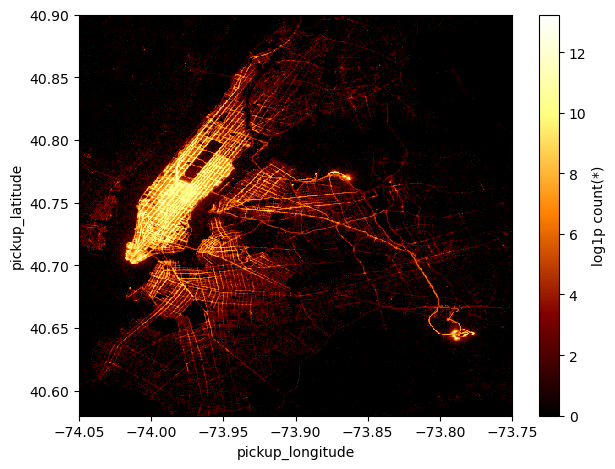

In [5]:
%%time

df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, f="log1p", limits=[[lon_min, lon_max], [lat_min, lat_max]], 
               shape=512)

It takes only a handful of seconds for vaex to project ~150 million pickup locations onto a 512 squared grid!

With this density plot we are able to immediately recognize that the areas where most pickups have been made are, perhaps unsurprisingly, Midtown and Downtown Manhattan and JFK and La Guardia airports. In fact, the plot shows the logarithm of the number counts (+1, to avoid underflows) of pickup locations of taxi rides in each grid cell. In the call to `df.viz.heatmap` the argument `f='log1p'` is used to plot the log10 of the counts.

### Virtual columns

It is convenient to recast and manipulate some of the columns of the dataset, but we do not want to copy or store new data columns on memory since it would not be efficient. Vaex deals with this issue by creating *virtual columns*, which are just algebric expressions of some columns of the DataFrame and are computed on the fly when they are really needed.

Let's make a couple of virtual columns which will be useful later on.

In [6]:
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['delta_t'] = df.pickup_datetime - np.datetime64('2014-12-31')
df['trip_duration'] = df.dropoff_datetime - df.pickup_datetime

### Selections and data filtering

As always the case in a real-life dataset, there are some inconsistent (or outright wrong) entries which we can just filter out, as a first step, just to work with a cleaner catalog. vaex, similarly to pandas, makes filtering extremely easy and it executes that very efficiently.

Let's create a new virtual DataFrame without copying the whole catalog

In [7]:
%%time
select = (df.fare_amount>0) & (df.fare_amount<1e3) & (df.trip_duration.td.seconds > 0) & (df.trip_distance>0.1)
df_g = df[select]
df_g

CPU times: user 77.2 ms, sys: 106 ms, total: 183 ms
Wall time: 186 ms


#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,delta_t,trip_duration
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.09,-73.986725,40.75642,1.0,nan,-73.99646,40.742893,5.0,0.5,0.5,0.0,0.0,6.0,2,-15 days +2:26:00,0 days +0:02:00
1,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.59,-73.9939,40.75011,1.0,0.0,-73.974785,40.750618,12.0,1.0,0.5,3.25,0.0,17.05,19,15 days +19:05:39,0 days +0:18:03
2,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.3,-74.00165,40.724243,1.0,0.0,-73.994415,40.75911,14.5,0.5,0.5,2.0,0.0,17.8,20,10 days +20:33:38,0 days +0:19:50
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.8,-73.96334,40.802788,1.0,0.0,-73.95182,40.824413,9.5,0.5,0.5,0.0,0.0,10.8,20,10 days +20:33:38,0 days +0:10:03
4,CMT,2015-01-10 20:33:39.000000000,2015-01-10 20:35:31.000000000,1,2,0.5,-74.00909,40.713818,1.0,0.0,-74.004326,40.719986,3.5,0.5,0.5,0.0,0.0,4.8,20,10 days +20:33:39,0 days +0:01:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"144,754,723",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56,23,365 days +23:59:56,0 days +0:08:22
"144,754,724",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8,23,365 days +23:59:58,0 days +0:05:21
"144,754,725",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8,23,365 days +23:59:59,0 days +0:12:56
"144,754,726",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8,23,365 days +23:59:59,0 days +0:10:27


Notice again how time-efficient is vaex in making all these computations!

With this simple filter we have excluded just about ~1.5 millions bad entries.

### Visualising the dataset: histograms

We can make a 1D histogram of a particular column of the dataset super rapidly with vaex

CPU times: user 3.85 s, sys: 187 ms, total: 4.04 s
Wall time: 1.59 s


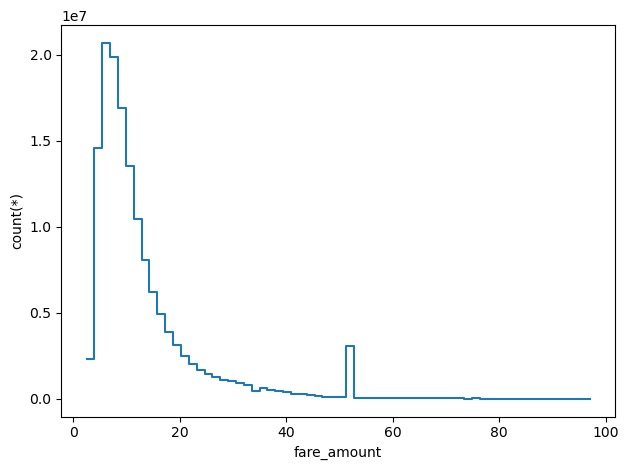

In [8]:
%%time
df_g.viz.histogram(df_g.fare_amount, limits=['99.9%'])

In this case I plotted the histogram of `fare_amount` excluding just the 0.1% of the data, which fall above 100 dollars. Besides the peak at around ~10 dollars, there is another interesting one around ~50 dollars, more on that later.

Vaex is capable of computing also more complex statistics than simple number counts or means. In fact, we can, for instance, compute the mean of a given quantity in bins defined by another variable. Let's try computing the mean tip given in bins of increasing amount of the fare.

### Complex statistics

In [9]:
df_g.mean("tip_amount", binby="fare_amount", limits=[0,100])

array([ 1.24615086,  1.31824944,  1.53340081,  0.51718142,  0.46147066,
        0.59263165,  0.69311445,  0.791446  ,  0.91056176,  1.00057614,
        1.0953817 ,  1.19607773,  1.2916218 ,  1.38734044,  1.47117175,
        1.55433318,  1.63946631,  1.75428071,  1.83764361,  1.90678516,
        1.98301335,  2.06862393,  2.17303128,  2.28266249,  2.4220901 ,
        2.51835345,  2.63312695,  2.74727874,  5.68542252,  2.98677164,
        3.12845026,  3.27011756,  3.42395457,  3.62165357,  3.76862303,
        3.91716274,  4.06953834,  4.23343799,  4.37480845,  4.51016812,
        4.63398971,  4.72375694,  4.80639364,  4.88026463,  4.96728114,
        5.05044797,  5.12848066,  5.197662  ,  5.27430279,  5.37765361,
        5.46007357,  5.50465598,  5.60081093,  5.67422745,  5.73286278,
        5.76873598,  5.83555711,  6.04623598,  5.90150785,  5.84556602,
        5.89371439,  5.87853757,  5.94627038,  5.99542183,  6.11809826,
        6.05648019,  6.76603627,  6.20229916,  6.2231958 ,  6.33

And we can plot it with vaex's functions

CPU times: user 2.17 s, sys: 40.3 ms, total: 2.21 s
Wall time: 722 ms


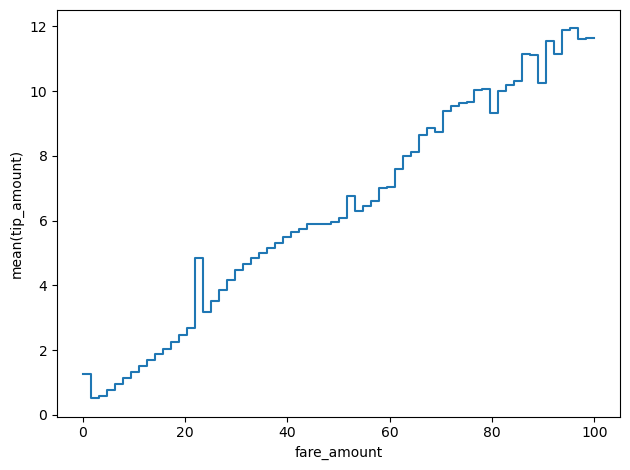

In [10]:
%%time
df_g.viz.histogram(df_g.fare_amount, what='mean(tip_amount)', limits=[0,100])

### Time series

Having defined a reference point in time, being Dec. 31st 2014, we can use the `delta_t` virtual column to visualise the time series of the number counts of taxi trips

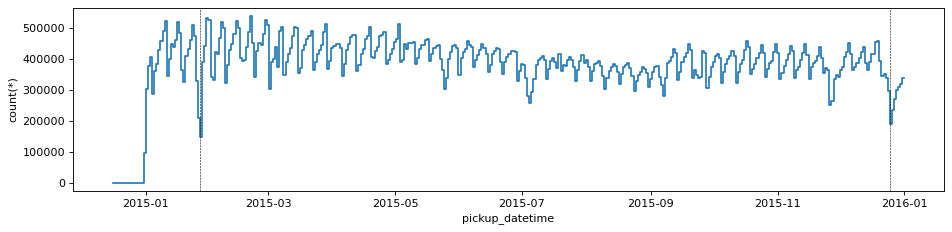

In [11]:
size = 380

df_g.viz.histogram("pickup_datetime", grid=df_g.count(binby="delta_t", shape=size), shape=size, figsize=(12,3))
plt.gca().axvline(np.datetime64('2015-12-25'), c='k', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-01-27'), c='k', ls='--', lw=0.5)

This plot shows the sinusoidal behaviour of the number counts of trips due to workdays/weekends. We can notice that there are 2 deep low points that stand out, which are the 2 days where the least amount of taxi rides have been hired: Christmas day and Jan. 27th, which was during a big snow storm in New York.

Similarly we can explore which were the more profitable days of the year for the Yellow taxi company, by plotting the sum of the total amounts paid by their clients

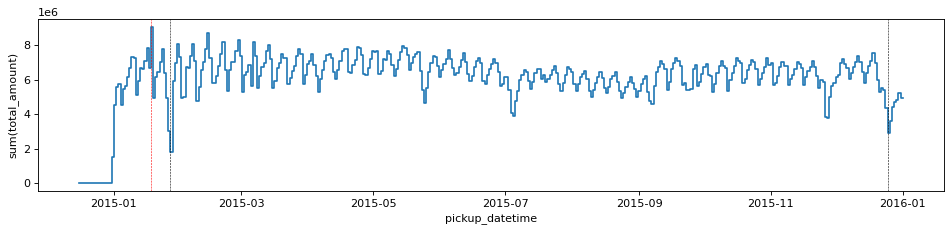

In [12]:
df_g.viz.histogram("pickup_datetime", grid=df_g.sum("total_amount", binby="delta_t", shape=size), 
                   shape=size, figsize=(12,3), ylabel="sum(total_amount)")
plt.gca().axvline(np.datetime64('2015-12-25'), c='k', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-01-27'), c='k', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-01-18'), c='r', ls='--', lw=0.5)

The plot is very similar to the one above, since the more trips the more revenue, but anyway there is a particular day, Jan. 18th, where the taxis have charged for slightly more than average per trip, thus making it the most profitable day of the year.

In fact, we can also look at which were the days where taxis have accumulated the higher number of miles travelled, by calculating the sum of the trip distances per day

/Users/lposti/anaconda/envs/py37/lib/python3.7/site-packages/vaex/viz/mpl.py:146: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


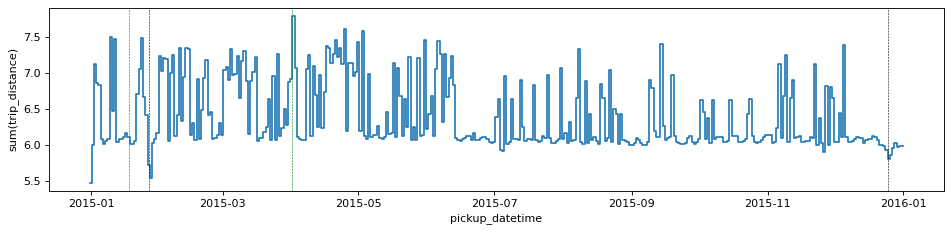

In [13]:
df_g.viz.histogram("pickup_datetime", grid=df_g.sum("trip_distance", binby="delta_t", shape=size), 
                   shape=size, figsize=(12,3), ylabel="sum(trip_distance)", f='log10')
plt.gca().axvline(np.datetime64('2015-12-25'), c='k', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-01-27'), c='k', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-01-18'), c='r', ls='--', lw=0.5)
plt.gca().axvline(np.datetime64('2015-04-01'), c='g', ls='--', lw=0.5)

This shows that while Jan 18th was the mos profitable day of the year, it was actually just average in terms of how many miles the taxis have collectively travelled. Instead, the day with most miles travelled is April 1st.

## A taste of real data exploration

Naturally we are interested at navigating and exploring in quite more detail a rich dataset such as the NYC taxi and vaex is designed just to do that.

As an example, let's have a look at the space of trip duration vs. trip distance

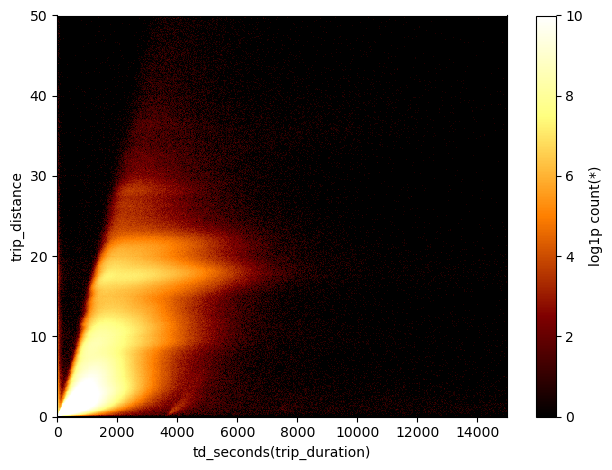

In [14]:
df_g.viz.heatmap(df_g.trip_duration.td.seconds, df_g.trip_distance, limits=[[0,15000],[0,50]], 
                 shape=501, f='log1p', vmin=0, vmax=10)

### A peculiar group 1

We see an obvious correlation of the two quantities, but that's not the only clear feature in this plot. There are interesting horizontal stripes - indicating that trips of equal distance in miles can take wildly different time presumably because of traffic - and a group of data that follows the overall correlation, but appears separate with respect to the main cluster of data. Let's select this small set of points

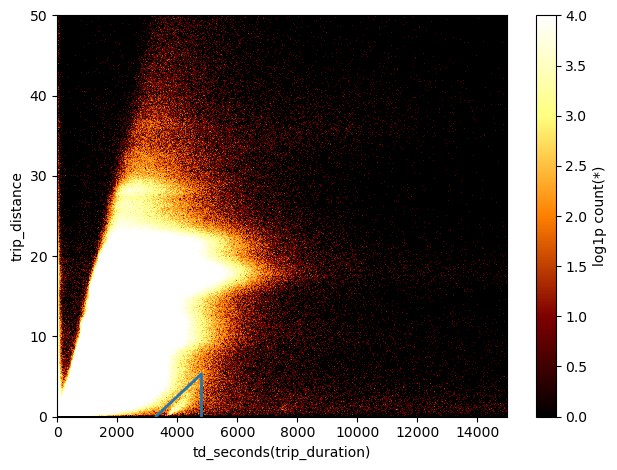

In [15]:
df_g.viz.heatmap(df.trip_duration.td.seconds, df.trip_distance, limits=[[0,15000],[0,50]], 
               shape=501, f='log1p', vmin=0, vmax=4)
plt.gca().plot(np.linspace(3300,4800), np.linspace(3300,4800)*3.5e-3-11.5, c='C0', lw=2)
plt.gca().plot([4800, 4800], [0,5], c='C0', lw=2)

Here I have just over-saturated the heatmap, to see better the limits of this group of data, and I've drawn lines to select it. Let's define the selection:

In [16]:
sel_group = ((df_g.trip_distance<df_g.trip_duration.td.seconds*3.5e-3-11.5) & (df_g.trip_duration.td.seconds<4800))

Now that we have a selection we can as ourselves when did these trip took place. To answer this we can use the same histogram that we plotted before, but this time including the selection of the group of points.

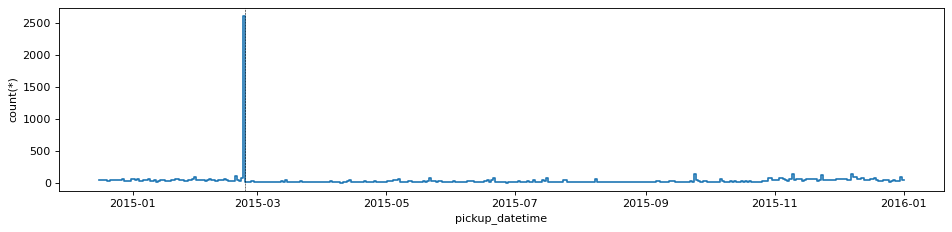

In [17]:
df_g.viz.histogram("pickup_datetime", grid=df_g.count(binby="delta_t", shape=size, selection=sel_group), 
                   shape=size, figsize=(12,3), selection=sel_group)
plt.gca().axvline(np.datetime64('2015-02-23'), c='k', ls='--', lw=0.5)

Clearly it seems that all of those trips originated on a particular day, Feb. 23rd 2015!

Now, I have no idea of what happened on that particular day, maybe just a malfunction of the instruments, but at least we have singled out this particular group of trips from the rest of the dataset.

### A peculiar group 2

We can use this weird data projections, such as the space of trip duration vs. trip distance, to select particular groups of data not only looking at the number counts, but also exploring other more complex statistics. For instance, let's colour the grid cells by mean pickup hour:

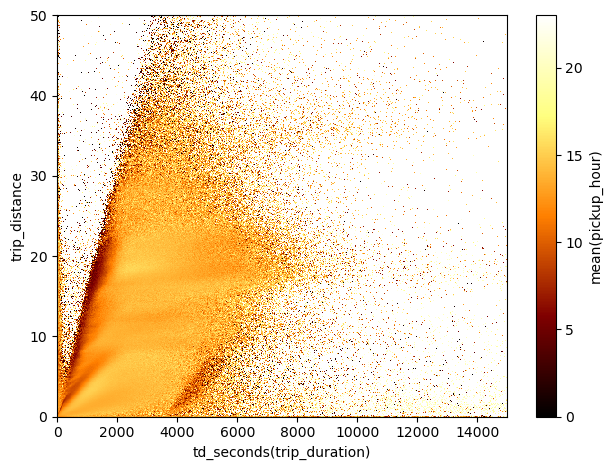

In [18]:
df.viz.heatmap("td_seconds(trip_duration)", "trip_distance", what="mean(pickup_hour)", limits=[[0,15000],[0,50]], 
               shape=501)

Again, it is pretty evident that there are some non-trivial features in this diagram. Let's focus on the cluster of trips done after midnight and in the morning that appears on the ridge of the main correlation.

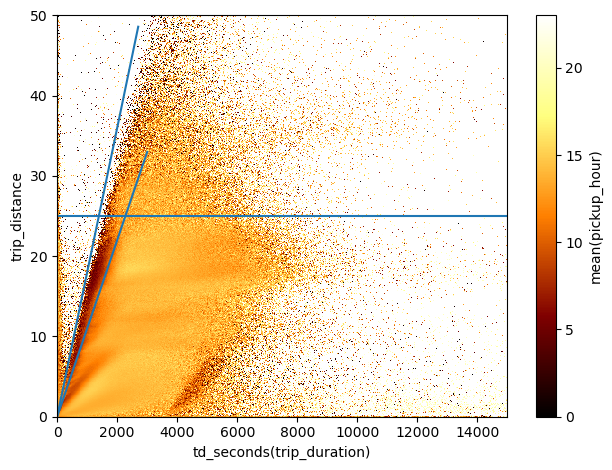

In [19]:
df.viz.heatmap("td_seconds(trip_duration)", "trip_distance", what="mean(pickup_hour)", limits=[[0,15000],[0,50]], 
               shape=501)
plt.gca().plot(np.linspace(0,3000), np.linspace(0,3000)*1.1e-2, c='C0')
plt.gca().plot(np.linspace(0,2700), np.linspace(0,2700)*1.8e-2, c='C0')
plt.gca().axhline(25)

Here I've drawn some auxiliary lines that I can use to make another group selection

In [20]:
sel_group = ((df.trip_distance<df.trip_duration.td.seconds*1.8e-2) & 
             (df.trip_distance>df.trip_duration.td.seconds*1.1e-2) & 
             (df.trip_distance<25) & (df.pickup_hour>3))

In this selection I have also excluded the trips done just after midnight, to focus in particular on those done in the early morning.

Let's now plot these trips on the NYC map.

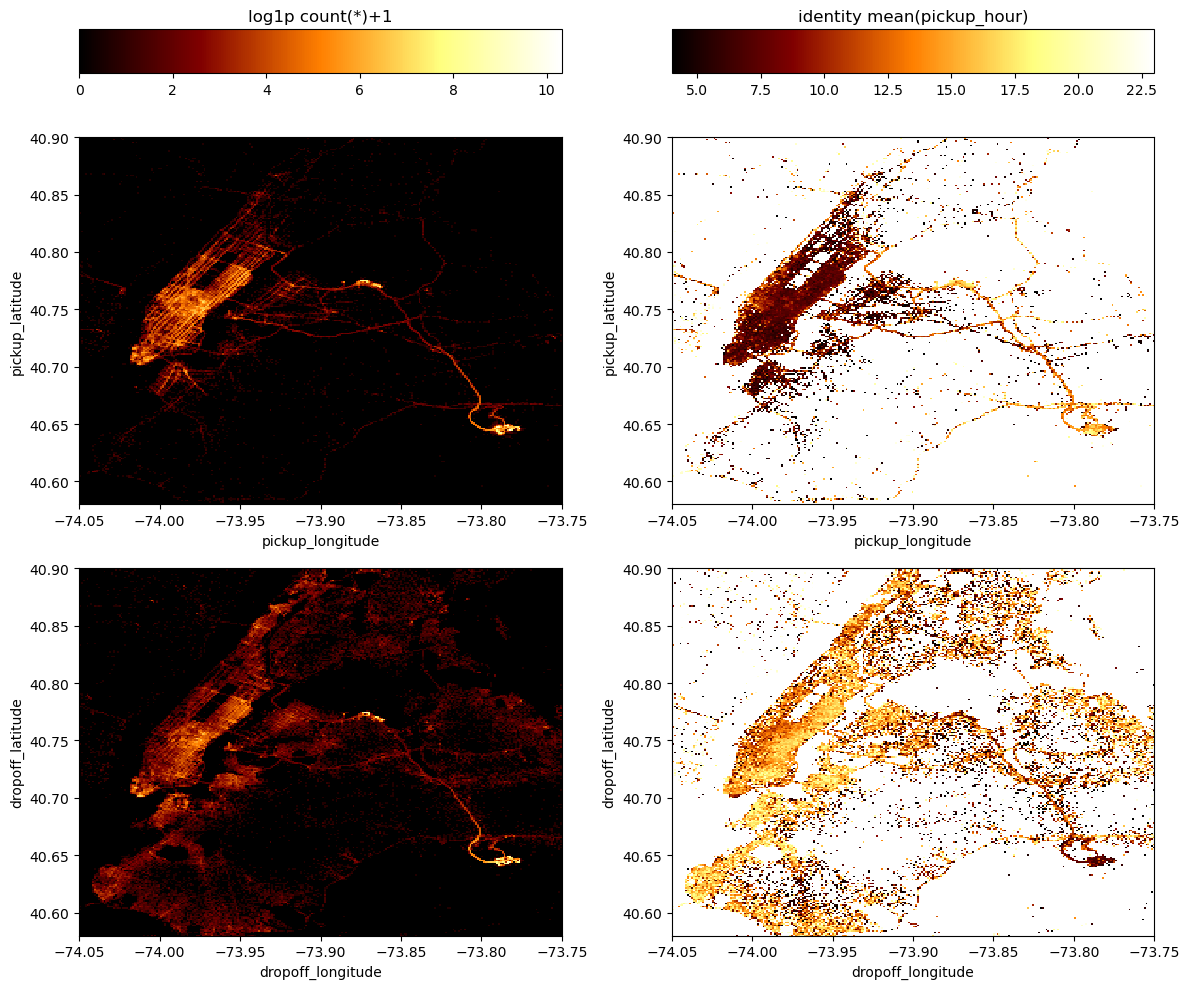

In [21]:
df.viz.heatmap([["pickup_longitude", "pickup_latitude"],["dropoff_longitude", "dropoff_latitude"]], 
               limits=[[[lon_min, lon_max], [lat_min, lat_max]],[[lon_min, lon_max], [lat_min, lat_max]]], 
               what=["count(*)+1","mean(pickup_hour)"], figsize=(12,10),
               f=["log1p","identity"], shape=256,
               selection=sel_group)

In this Figure, the top panels show maps of pickup locations and the bottom panels show maps of the dropoff locations, while the left panels are density maps of the number counts of trips and in the right panels each grid cell is colored by mean pickup hour. In particular in these maps on the right we see an interesting behaviour: in the group of trips that we have selected, the early morning ones - corresponding to dark colors - have pickup locations all across Manhattan, while they have very concentrated dropoff locations at the JFK airport. 

This means that the group of early morning trips we have selected along the ridge of the trip duration vs. trip distance diagram is made by travellers reaching JFK airport mostly from Manhattan.

### How long does it take to reach JFK airport from lower Manhattan?

Finally, the last thing that I wanted to show in this notebook is that with vaex we can easily explore how do trip times vary as a function of pickup and dropoff location and time of day.

First of all let's make a simple function to define a rectangular filter in longitude and latitude:

In [22]:
def bbox(long, lat, min_x=-np.inf, max_x=np.inf, min_y=-np.inf, max_y=np.inf):
    """ Bounding box filter

    Parameters
    ----------                        
    long: vaex Expression
        The column of the DataFrame with longitudes
    lat : vaex Expression
        The column of the DataFrame with longitudes
        
    min_i, max_i: float
        The bounding box limits for each coordinate.

    Returns
    -------
    bb_filter : vaex Expression
        Bounding box selection 

    """

    bound_x = (long>min_x) & (long<max_x)
    bound_y = (lat>min_y)  & (lat<max_y)

    bb_filter = bound_x & bound_y

    return bb_filter

Now, we can define the vertices of the bounding boxes for the dropoff location at JFK airport and for pickup locations in lower Manhattan:

In [23]:
bbox_jfk = {'min_x':-73.81850, 'max_x':-73.77123, 'min_y':40.63755, 'max_y':40.66475}
bbox_fin = {'min_x':-74.01993, 'max_x':-73.99855, 'min_y':40.70000, 'max_y':40.71399}

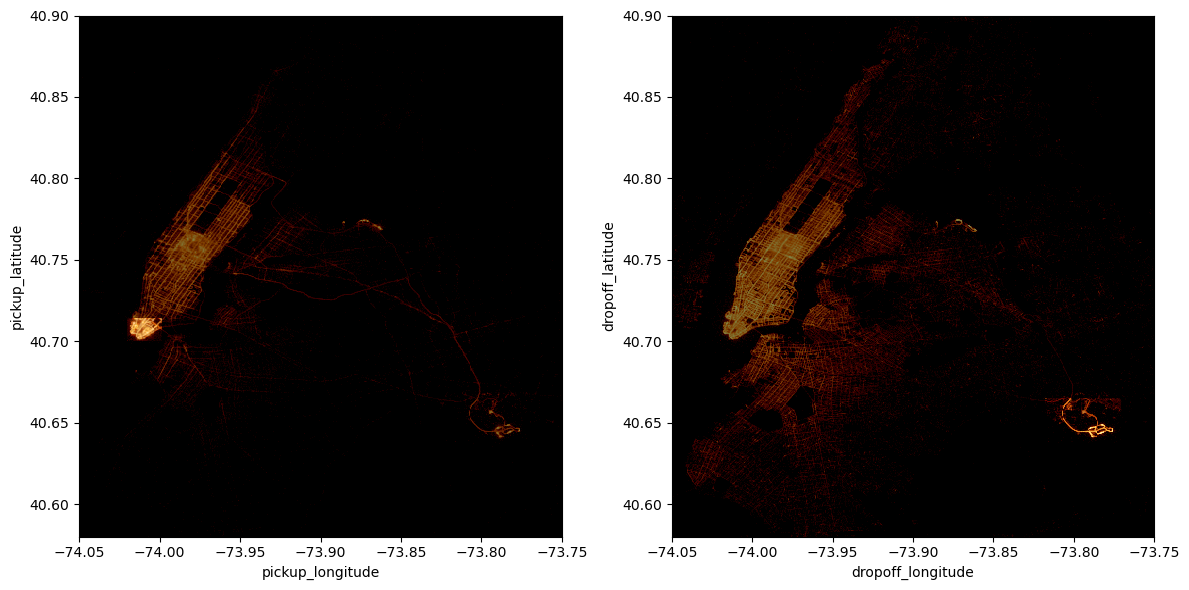

In [24]:
df_g.viz.heatmap([["pickup_longitude", "pickup_latitude"], ["dropoff_longitude", "dropoff_latitude"]], f="log1p", 
                 limits=[[[lon_min, lon_max], [lat_min, lat_max]],[[lon_min, lon_max], [lat_min, lat_max]]], 
                 shape=512, figsize=(12,6),
                 selection=[bbox(df_g.pickup_longitude, df_g.pickup_latitude, **bbox_fin),
                            bbox(df_g.dropoff_longitude, df_g.dropoff_latitude, **bbox_jfk)])

The two plots above highlight our rectangular selections in the pickup and dropoff locations maps.

Now let's define an expression that holds together the two selections (I am also excluding trips that started at JFK, just have a cleaner catalog)

In [25]:
sel_trips = bbox(df_g.pickup_longitude, df_g.pickup_latitude, **bbox_fin) & bbox(df_g.dropoff_longitude, df_g.dropoff_latitude, **bbox_jfk) & ~bbox(df_g.pickup_longitude, df_g.pickup_latitude, **bbox_jfk)


And now let's use vaex to compute the mean trip duration in seconds for this group of trips as a function of hour of pickup:

In [26]:
%%time
mean = df_g.mean("td_seconds(trip_duration)", binby="pickup_hour", shape=23, selection=sel_trips)

CPU times: user 29.6 s, sys: 4.48 s, total: 34.1 s
Wall time: 11.2 s


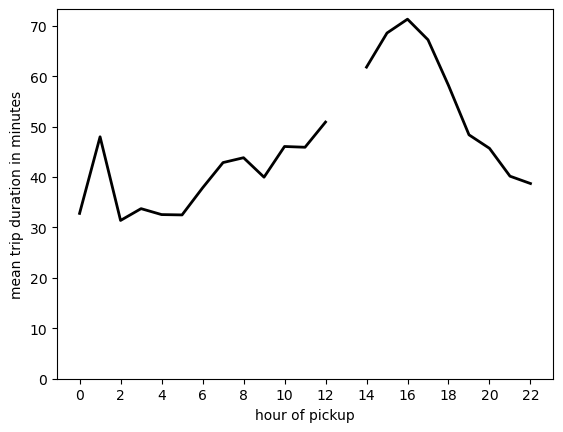

In [27]:
plt.plot(np.arange(0,23), mean/60., 'k-', lw=2)
plt.ylim([0, None])
plt.xlabel("hour of pickup")
plt.ylabel("mean trip duration in minutes")
plt.xticks(np.arange(0,23,2));

Perhaps unexpectedly, if you have to take a flight in the afternoon you better ride your taxi quite in advance or consider public transportation!

aand that's all for this little showcase! I will continue to use vaex for my big data visualisation and exploration needs in the future and I will report here if I see anything cool along the way.